In [463]:
import pandas as pd
import numpy as np
import json
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords
from collections import defaultdict
import nltk
import gensim
import os
import string
import re
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.cluster import DBSCAN
from sklearn.externals import joblib
import csv
import tweepy
import cnfg
import datetime
import quandl
import matplotlib.pyplot as plt
quandl.ApiConfig.api_key = '***************' 


pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)

In [143]:
sandp100 = ['AAPL','ABBV','ABT','ACN','AGN','AIG','ALL','AMGN','AMZN','AXP','BA','BAC',
            'BIIB','BK','BLK','BMY','BRK.B','C','CAT','CELG','CL','CMCSA','COF','COP',
            'COST','CSCO','CVS','CVX','DD','DHR','DIS','DOW','DUK','EMR','EXC','F','FB',
            'FDX','FOX','FOXA','GD','GE','GILD','GM','GOOG','GOOGL','GS','HAL','HD','HON',
            'IBM','INTC','JNJ','JPM','KHC','KMI','KO','LLY','LMT','LOW','MA','MCD','MDLZ',
            'MDT','MET','MMM','MO','MON','MRK','MS','MSFT','NEE','NKE','ORCL','OXY','PCLN',
            'PEP','PFE','PG','PM','PYPL','QCOM','RTN','SBUX','SLB','SO','SPG','T','TGT',
            'TWX','TXN','UNH','UNP','UPS','USB','UTX','V','VZ','WBA','WFC','WMT','XOM']

sandp100find = ["XX'AAPL","XX'ABBV","XX'ABT","XX'ACN","XX'AGN","XX'AIG","XX'ALL","XX'AMGN",
                "XX'AMZN","XX'AXP","XX'BA","XX'BAC","XX'BIIB","XX'BK","XX'BLK","XX'BMY",
                "XX'BRK.B","XX'C","XX'CAT","XX'CELG","XX'CL","XX'CMCSA","XX'COF","XX'COP",
                "XX'COST","XX'CSCO","XX'CVS","XX'CVX","XX'DD","XX'DHR","XX'DIS","XX'DOW",
                "XX'DUK","XX'EMR","XX'EXC","XX'F","XX'FB","XX'FDX","XX'FOX","XX'FOXA","XX'GD",
                "XX'GE","XX'GILD","XX'GM","XX'GOOG","XX'GOOGL","XX'GS","XX'HAL","XX'HD","XX'HON",
                "XX'IBM","XX'INTC","XX'JNJ","XX'JPM","XX'KHC","XX'KMI","XX'KO","XX'LLY","XX'LMT",
                "XX'LOW","XX'MA","XX'MCD","XX'MDLZ","XX'MDT","XX'MET","XX'MMM","XX'MO","XX'MON",
                "XX'MRK","XX'MS","XX'MSFT","XX'NEE","XX'NKE","XX'ORCL","XX'OXY","XX'PCLN","XX'PEP",
                "XX'PFE","XX'PG","XX'PM","XX'PYPL","XX'QCOM","XX'RTN","XX'SBUX","XX'SLB","XX'SO",
                "XX'SPG","XX'T","XX'TGT","XX'TWX","XX'TXN","XX'UNH","XX'UNP","XX'UPS","XX'USB",
                "XX'UTX","XX'V","XX'VZ","XX'WBA","XX'WFC","XX'WMT","XX'XOM"]

sandp100lower = [element.lower() for element in sandp100]

In [144]:
stock_quan = pd.read_csv('WIKI_PRICES_1ef64a24111c5bc7e6a0a66f6e37080e.csv')
quanstocklist = list(stock_quan.ticker.unique())
quanstocklist.remove('AA')
quanstocklist.remove('ANF')
quanstocklist.remove('AMD')
quanstocklist.remove('FOSL')
quanstocklist.remove('TASR')

In [145]:
from pandas import DataFrame
import json
from pymongo import MongoClient


client = MongoClient(port=12345)
db = client.stocks


df = DataFrame(list(db.stocks.find({})))

In [146]:
icahn = DataFrame(list(db.icahn.find({})))
icahn['user'] = 'icahn'

In [147]:
list1 = []
for i in range(len(icahn['text'])):
    list1.append(icahn['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(icahn['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
icahn['cleanedtext'] = se2.values

In [148]:
icahn = icahn[icahn['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
# icahn = icahn[icahn['cleanedtext'].str.contains("AAPL|ABBV|ABT|ACN|AGN|AIG|ALL|AMGN|AMZN|AXP|BA|BAC|BIIB|BK|BLK|BMY|BRK.B|C|CAT|CELG|CL|CMCSA|COF|COP|COST|CSCO|CVS|CVX|DD|DHR|DIS|DOW|DUK|EMR|EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=False)]
icahn = icahn[icahn['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]




In [149]:
icahn['date'] = icahn['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

In [150]:
icahn = icahn.sort_values(by='date')
icahnextract = icahn.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
icahnextract = icahnextract.unstack()
icahn = icahn.join(icahnextract)
icahn = icahn.reset_index()

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [151]:
for i in range(8, icahn.shape[1]):
    icahn.iloc[:,i] = icahn.iloc[:,i].str.replace("XX'", '')

In [152]:
icahn = icahn[(icahn['date']>datetime.date(2010,9,12)) & (icahn['date']<datetime.date(2017,5,1))]

In [153]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt

In [154]:
listicahn = []
for i in icahn.cleanedtext:
    listicahn.append(print_sentiment_scores(i))

se3 = pd.Series(listicahn)
icahn['compound'] = se3.values

In [155]:
icahn = icahn[icahn['compound'] > 0.0]
icahn.drop(['compound'], axis=1, inplace=True)

In [156]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(icahn.iloc[:,7], icahn.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
icahn['return_one_portfolio'] = se.values
icahn['return_one_portfolio'] = pd.to_numeric(icahn['return_one_portfolio'], errors='coerce')

In [157]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(icahn.iloc[:,7], icahn.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
icahn['return_one'] = se.values
icahn['return_one'] = pd.to_numeric(icahn['return_one'], errors='coerce')

In [158]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(icahn.iloc[:,7], icahn.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
icahn['volatility'] = se.values
icahn['volatility'] = pd.to_numeric(icahn['volatility'], errors='coerce')


/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [356]:
def calc_momentum(X):
    count = 0
    open_list = []
    close_list = []
    for a, b in zip(icahn.iloc[:,7], icahn.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            open_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            open_list.append(my_data.iloc[0,0])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    open_list = list(map(float, open_list))
    close_list = list(map(float,close_list))
    final_list = [np.log(z/x) for x,z in zip(open_list,close_list)]
    return final_list


# np.log(closes/opens)
    
se = pd.Series(calc_momentum(8))
icahn['momentum'] = se.values
icahn['momentum'] = pd.to_numeric(icahn['momentum'], errors='coerce')

In [159]:
#Portfolio Sharpe
(icahn['return_one_portfolio'].mean() - .00109)/(icahn['return_one_portfolio'].std()) * np.sqrt(252)

2.0825901114473022

In [160]:
#Single Average Sharpe Ratio
(icahn['return_one'].mean() - .00109)/(icahn['return_one'].std()) * np.sqrt(252)

2.796824719082593

**PETER W**

In [161]:
peterw = DataFrame(list(db.peterw.find({})))
peterw['user'] = 'peterw'

In [162]:
list1 = []
for i in range(len(peterw['text'])):
    list1.append(peterw['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(peterw['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
peterw['cleanedtext'] = se2.values

In [163]:
peterw = peterw[peterw['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
peterw = peterw[peterw['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


peterw['date'] = peterw['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

peterw = peterw.sort_values(by='date')
peterwextract = peterw.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
peterwextract = peterwextract.unstack()
peterw = peterw.join(peterwextract)
peterw = peterw.reset_index()


for i in range(8, peterw.shape[1]):
    peterw.iloc[:,i] = peterw.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [164]:
peterw = peterw[(peterw['date']>datetime.date(2010,9,12)) & (peterw['date']<datetime.date(2017,5,1))]

In [165]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt


listpeterw = []
for i in peterw.cleanedtext:
    listpeterw.append(print_sentiment_scores(i))

se3 = pd.Series(listpeterw)
peterw['compound'] = se3.values


peterw = peterw[peterw['compound'] > 0.1]
peterw.drop(['compound'], axis=1, inplace=True)

In [166]:
peterw = peterw[peterw.iloc[:,8] != 'UA']

In [167]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(peterw.iloc[:,7], peterw.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
peterw['return_one_portfolio'] = se.values
peterw['return_one_portfolio'] = pd.to_numeric(peterw['return_one_portfolio'], errors='coerce')

In [168]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(peterw.iloc[:,7], peterw.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
peterw['return_one'] = se.values
peterw['return_one'] = pd.to_numeric(peterw['return_one'], errors='coerce')

In [169]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(peterw.iloc[:,7], peterw.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
peterw['volatility'] = se.values
peterw['volatility'] = pd.to_numeric(peterw['volatility'], errors='coerce')


/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [355]:
def calc_momentum(X):
    count = 0
    open_list = []
    close_list = []
    for a, b in zip(peterw.iloc[:,7], peterw.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            open_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            open_list.append(my_data.iloc[0,0])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    open_list = list(map(float, open_list))
    close_list = list(map(float,close_list))
    final_list = [np.log(z/x) for x,z in zip(open_list,close_list)]
    return final_list


# np.log(closes/opens)
    
se = pd.Series(calc_momentum(8))
peterw['momentum'] = se.values
peterw['momentum'] = pd.to_numeric(peterw['momentum'], errors='coerce')

In [170]:
#Portfolio Sharpe
(peterw['return_one_portfolio'].mean() - .00109)/(peterw['return_one_portfolio'].std()) * np.sqrt(252)

1.3961502195272659

In [171]:
#Single Average Sharpe Ratio
(peterw['return_one'].mean() - .00109)/(peterw['return_one'].std()) * np.sqrt(252)

2.1953741659892203

**BERGEN**

In [172]:
bergencapital = DataFrame(list(db.bergencapital.find({})))
bergencapital['user'] = 'bergencapital'

In [173]:
list1 = []
for i in range(len(bergencapital['text'])):
    list1.append(bergencapital['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(bergencapital['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
bergencapital['cleanedtext'] = se2.values

In [174]:
bergencapital = bergencapital[bergencapital['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
bergencapital = bergencapital[bergencapital['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


bergencapital['date'] = bergencapital['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

bergencapital = bergencapital.sort_values(by='date')
bergencapitalextract = bergencapital.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
bergencapitalextract = bergencapitalextract.unstack()
bergencapital = bergencapital.join(bergencapitalextract)
bergencapital = bergencapital.reset_index()


for i in range(8, bergencapital.shape[1]):
    bergencapital.iloc[:,i] = bergencapital.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [175]:
bergencapital = bergencapital[(bergencapital['date']>datetime.date(2010,9,12)) & (bergencapital['date']<datetime.date(2017,5,1))]

In [176]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt


listbergencapital = []
for i in bergencapital.cleanedtext:
    listbergencapital.append(print_sentiment_scores(i))

se3 = pd.Series(listbergencapital)
bergencapital['compound'] = se3.values


bergencapital = bergencapital[bergencapital['compound'] > 0.2]
bergencapital.drop(['compound'], axis=1, inplace=True)

In [177]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(bergencapital.iloc[:,7], bergencapital.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
bergencapital['return_one_portfolio'] = se.values
bergencapital['return_one_portfolio'] = pd.to_numeric(bergencapital['return_one_portfolio'], errors='coerce')

In [178]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(bergencapital.iloc[:,7], bergencapital.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
bergencapital['return_one'] = se.values
bergencapital['return_one'] = pd.to_numeric(bergencapital['return_one'], errors='coerce')

In [179]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(bergencapital.iloc[:,7], bergencapital.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
bergencapital['volatility'] = se.values
bergencapital['volatility'] = pd.to_numeric(bergencapital['volatility'], errors='coerce')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [354]:
def calc_momentum(X):
    count = 0
    open_list = []
    close_list = []
    for a, b in zip(bergencapital.iloc[:,7], bergencapital.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            open_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            open_list.append(my_data.iloc[0,0])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    open_list = list(map(float, open_list))
    close_list = list(map(float,close_list))
    final_list = [np.log(z/x) for x,z in zip(open_list,close_list)]
    return final_list


# np.log(closes/opens)
    
se = pd.Series(calc_momentum(8))
bergencapital['momentum'] = se.values
bergencapital['momentum'] = pd.to_numeric(bergencapital['momentum'], errors='coerce')

In [180]:
#Portfolio Sharpe
(bergencapital['return_one_portfolio'].mean() - .00109)/(bergencapital['return_one_portfolio'].std()) * np.sqrt(252)

0.9988352976772682

In [181]:
#Single Average Sharpe Ratio
(bergencapital['return_one'].mean() - .00109)/(bergencapital['return_one'].std()) * np.sqrt(252)

1.8159003038721571

**DOW**

In [182]:
markdow = DataFrame(list(db.markdow.find({})))
markdow['user'] = 'markdow'

In [183]:
list1 = []
for i in range(len(markdow['text'])):
    list1.append(markdow['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(markdow['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
markdow['cleanedtext'] = se2.values

In [184]:
markdow = markdow[markdow['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
markdow = markdow[markdow['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


markdow['date'] = markdow['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

markdow = markdow.sort_values(by='date')
markdowextract = markdow.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
markdowextract = markdowextract.unstack()
markdow = markdow.join(markdowextract)
markdow = markdow.reset_index()


for i in range(8, markdow.shape[1]):
    markdow.iloc[:,i] = markdow.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [185]:
markdow = markdow[(markdow['date']>datetime.date(2010,9,12)) & (markdow['date']<datetime.date(2017,5,1))]

In [186]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt


listmarkdow = []
for i in markdow.cleanedtext:
    listmarkdow.append(print_sentiment_scores(i))

se3 = pd.Series(listmarkdow)
markdow['compound'] = se3.values


markdow = markdow[markdow['compound'] > 0.1]
markdow.drop(['compound'], axis=1, inplace=True)

In [187]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(markdow.iloc[:,7], markdow.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
markdow['return_one_portfolio'] = se.values
markdow['return_one_portfolio'] = pd.to_numeric(markdow['return_one_portfolio'], errors='coerce')

In [188]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(markdow.iloc[:,7], markdow.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
markdow['return_one'] = se.values
markdow['return_one'] = pd.to_numeric(markdow['return_one'], errors='coerce')

In [189]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(markdow.iloc[:,7], markdow.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
markdow['volatility'] = se.values
markdow['volatility'] = pd.to_numeric(markdow['volatility'], errors='coerce')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [352]:
def calc_momentum(X):
    count = 0
    open_list = []
    close_list = []
    for a, b in zip(markdow.iloc[:,7], markdow.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            open_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            open_list.append(my_data.iloc[0,0])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    open_list = list(map(float, open_list))
    close_list = list(map(float,close_list))
    final_list = [np.log(z/x) for x,z in zip(open_list,close_list)]
    return final_list


# np.log(closes/opens)
    
se = pd.Series(calc_momentum(8))
markdow['momentum'] = se.values
markdow['momentum'] = pd.to_numeric(markdow['momentum'], errors='coerce')

In [190]:
#Portfolio Sharpe
(markdow['return_one_portfolio'].mean() - .00109)/(markdow['return_one_portfolio'].std()) * np.sqrt(252)

1.1517300333443612

In [191]:
#Single Average Sharpe Ratio
(markdow['return_one'].mean() - .00109)/(markdow['return_one'].std()) * np.sqrt(252)

2.0347208827963912

**Lexvandam**

In [192]:
lexvandam = DataFrame(list(db.lexvandam.find({})))
lexvandam['user'] = 'lexvandam'

In [193]:
list1 = []
for i in range(len(lexvandam['text'])):
    list1.append(lexvandam['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(lexvandam['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
lexvandam['cleanedtext'] = se2.values

In [194]:
lexvandam = lexvandam[lexvandam['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
lexvandam = lexvandam[lexvandam['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


lexvandam['date'] = lexvandam['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

lexvandam = lexvandam.sort_values(by='date')
lexvandamextract = lexvandam.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
lexvandamextract = lexvandamextract.unstack()
lexvandam = lexvandam.join(lexvandamextract)
lexvandam = lexvandam.reset_index()


for i in range(8, lexvandam.shape[1]):
    lexvandam.iloc[:,i] = lexvandam.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [195]:
lexvandam = lexvandam[(lexvandam['date']>datetime.date(2010,9,12)) & (lexvandam['date']<datetime.date(2017,5,1))]

In [196]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt


listlexvandam = []
for i in lexvandam.cleanedtext:
    listlexvandam.append(print_sentiment_scores(i))

se3 = pd.Series(listlexvandam)
lexvandam['compound'] = se3.values


lexvandam = lexvandam[lexvandam['compound'] > 0.1]
lexvandam.drop(['compound'], axis=1, inplace=True)

In [197]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(lexvandam.iloc[:,7], lexvandam.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
lexvandam['return_one_portfolio'] = se.values
lexvandam['return_one_portfolio'] = pd.to_numeric(lexvandam['return_one_portfolio'], errors='coerce')

In [198]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(lexvandam.iloc[:,7], lexvandam.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
lexvandam['return_one'] = se.values
lexvandam['return_one'] = pd.to_numeric(lexvandam['return_one'], errors='coerce')

In [199]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(lexvandam.iloc[:,7], lexvandam.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
lexvandam['volatility'] = se.values
lexvandam['volatility'] = pd.to_numeric(lexvandam['volatility'], errors='coerce')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [353]:
def calc_momentum(X):
    count = 0
    open_list = []
    close_list = []
    for a, b in zip(lexvandam.iloc[:,7], lexvandam.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            open_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            open_list.append(my_data.iloc[0,0])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    open_list = list(map(float, open_list))
    close_list = list(map(float,close_list))
    final_list = [np.log(z/x) for x,z in zip(open_list,close_list)]
    return final_list


# np.log(closes/opens)
    
se = pd.Series(calc_momentum(8))
lexvandam['momentum'] = se.values
lexvandam['momentum'] = pd.to_numeric(lexvandam['momentum'], errors='coerce')

In [200]:
#Portfolio Sharpe
(lexvandam['return_one_portfolio'].mean() - .00109)/(lexvandam['return_one_portfolio'].std()) * np.sqrt(252)

6.5855521886423283

In [201]:
#Single Average Sharpe Ratio
(lexvandam['return_one'].mean() - .00109)/(lexvandam['return_one'].std()) * np.sqrt(252)

6.9016977983817664

**timseymour**

In [202]:
timseymour = DataFrame(list(db.timseymour.find({})))
timseymour['user'] = 'timseymour'

In [203]:
list1 = []
for i in range(len(timseymour['text'])):
    list1.append(timseymour['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(timseymour['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
timseymour['cleanedtext'] = se2.values

In [204]:
timseymour = timseymour[timseymour['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
timseymour = timseymour[timseymour['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


timseymour['date'] = timseymour['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

timseymour = timseymour.sort_values(by='date')
timseymourextract = timseymour.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
timseymourextract = timseymourextract.unstack()
timseymour = timseymour.join(timseymourextract)
timseymour = timseymour.reset_index()


for i in range(8, timseymour.shape[1]):
    timseymour.iloc[:,i] = timseymour.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [205]:
timseymour = timseymour[(timseymour['date']>datetime.date(2010,9,12)) & (timseymour['date']<datetime.date(2017,5,1))]

In [206]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt


listtimseymour = []
for i in timseymour.cleanedtext:
    listtimseymour.append(print_sentiment_scores(i))

se3 = pd.Series(listtimseymour)
timseymour['compound'] = se3.values


timseymour = timseymour[timseymour['compound'] > 0.1]
timseymour.drop(['compound'], axis=1, inplace=True)

In [207]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(timseymour.iloc[:,7], timseymour.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
timseymour['return_one_portfolio'] = se.values
timseymour['return_one_portfolio'] = pd.to_numeric(timseymour['return_one_portfolio'], errors='coerce')

In [208]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(timseymour.iloc[:,7], timseymour.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
timseymour['return_one'] = se.values
timseymour['return_one'] = pd.to_numeric(timseymour['return_one'], errors='coerce')

In [209]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(timseymour.iloc[:,7], timseymour.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
timseymour['volatility'] = se.values
timseymour['volatility'] = pd.to_numeric(timseymour['volatility'], errors='coerce')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [351]:
def calc_momentum(X):
    count = 0
    open_list = []
    close_list = []
    for a, b in zip(timseymour.iloc[:,7], timseymour.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            open_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            open_list.append(my_data.iloc[0,0])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    open_list = list(map(float, open_list))
    close_list = list(map(float,close_list))
    final_list = [np.log(z/x) for x,z in zip(open_list,close_list)]
    return final_list


# np.log(closes/opens)
    
se = pd.Series(calc_momentum(8))
timseymour['momentum'] = se.values
timseymour['momentum'] = pd.to_numeric(timseymour['momentum'], errors='coerce')

In [210]:
#Portfolio Sharpe
(timseymour['return_one_portfolio'].mean() - .00109)/(timseymour['return_one_portfolio'].std()) * np.sqrt(252)

-5.9145024506312494

In [211]:
#Single Average Sharpe Ratio
(timseymour['return_one'].mean() - .00109)/(timseymour['return_one'].std()) * np.sqrt(252)

-4.6654432703042374

**GECKOJB**

In [212]:
geckojb = DataFrame(list(db.geckojb.find({})))
geckojb['user'] = 'geckojb'

In [213]:
list1 = []
for i in range(len(geckojb['text'])):
    list1.append(geckojb['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(geckojb['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
geckojb['cleanedtext'] = se2.values

In [214]:
geckojb = geckojb[geckojb['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
geckojb = geckojb[geckojb['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]


geckojb['date'] = geckojb['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

geckojb = geckojb.sort_values(by='date')
geckojbextract = geckojb.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
geckojbextract = geckojbextract.unstack()
geckojb = geckojb.join(geckojbextract)
geckojb = geckojb.reset_index()


for i in range(8, geckojb.shape[1]):
    geckojb.iloc[:,i] = geckojb.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [215]:
geckojb = geckojb[(geckojb['date']>datetime.date(2010,9,12)) & (geckojb['date']<datetime.date(2017,5,1))]

In [216]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = (analyser.polarity_scores(sentence)['compound'])
    return snt


listgeckojb = []
for i in geckojb.cleanedtext:
    listgeckojb.append(print_sentiment_scores(i))

se3 = pd.Series(listgeckojb)
geckojb['compound'] = se3.values


geckojb = geckojb[geckojb['compound'] > 0.1]
geckojb.drop(['compound'], axis=1, inplace=True)

In [217]:
geckojb = geckojb[geckojb.iloc[:,8] != 'COMPQ']
geckojb = geckojb[geckojb.iloc[:,8] != 'GOOG']

In [218]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(geckojb.iloc[:,7], geckojb.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
#         print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
geckojb['return_one_portfolio'] = se.values
geckojb['return_one_portfolio'] = pd.to_numeric(geckojb['return_one_portfolio'], errors='coerce')

In [219]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(geckojb.iloc[:,7], geckojb.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
geckojb['return_one'] = se.values
geckojb['return_one'] = pd.to_numeric(geckojb['return_one'], errors='coerce')

In [220]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(geckojb.iloc[:,7], geckojb.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
geckojb['volatility'] = se.values
geckojb['volatility'] = pd.to_numeric(geckojb['volatility'], errors='coerce')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [349]:
def calc_momentum(X):
    count = 0
    open_list = []
    close_list = []
    for a, b in zip(geckojb.iloc[:,7], geckojb.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            open_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            open_list.append(my_data.iloc[0,0])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    open_list = list(map(float, open_list))
    close_list = list(map(float,close_list))
    final_list = [np.log(z/x) for x,z in zip(open_list,close_list)]
    return final_list


# np.log(closes/opens)
    
se = pd.Series(calc_momentum(8))
geckojb['momentum'] = se.values
geckojb['momentum'] = pd.to_numeric(geckojb['momentum'], errors='coerce')

In [221]:
#Portfolio Sharpe
(geckojb['return_one_portfolio'].mean() - .00109)/(geckojb['return_one_portfolio'].std()) * np.sqrt(252)

1.588397180625905

In [223]:
#Single Average Sharpe Ratio
(geckojb['return_one'].mean() - .00109)/(geckojb['return_one'].std()) * np.sqrt(252)

2.5577296888059582

**Manipulate**

In [412]:
finviz = pd.read_csv('finviz.csv')
finviz1 = finviz.iloc[:,[1,3,4,5]]
icahn10 = icahn.iloc[:,[5,8,10,11,12]]
peterw10 = peterw.iloc[:,[5,8,14,15,16]]
bergencapital10 = bergencapital.iloc[:,[5,8,14,15,16]]
# markdow10 = markdow.iloc[:,[5,8,10,11,12]]
lexvandam10 = lexvandam.iloc[:,[5,8,15,16,17]]
timseymour10 = timseymour.iloc[:,[5,8,14,15,16]]
# geckojb10 = geckojb.iloc[:,[5,8,28,29,30]]



newdf=icahn10.append(peterw10)
newdf=newdf.append(bergencapital10)
# newdf=newdf.append(markdow10)
newdf = newdf.append(lexvandam10)
# newdf = newdf.append(timseymour10) ##AFTER MARKET PASSED
# newdf = newdf.append(geckojb10)



column_names = ['user', 'Ticker', 'return_one_portfolio', 'return_one', 'volatility']
newdf.columns = column_names
newdf = newdf.merge(finviz1, on='Ticker', how='left')

In [413]:
# newdf[(newdf['user'] == 'icahn') & (newdf['Ticker'] == 'AAPL')]

In [414]:
newdf = newdf.dropna()

In [415]:
import patsy
def onehotencode(column_name):
    global newdf
    st = patsy.dmatrix(column_name,
                     data=newdf,
                     return_type='dataframe')
    newdf.drop([column_name], axis=1, inplace=True)
    newdf = newdf.join(st)
    newdf.drop(['Intercept'], axis=1, inplace=True)
    return newdf

newdf = onehotencode('Sector')
newdf = onehotencode('Industry')
newdf = onehotencode('Country')
newdf = onehotencode('Ticker')
newdf = onehotencode('user')

In [416]:
newdf.columns = newdf.columns.map(lambda x: x.replace('[', '_'))
newdf.columns = newdf.columns.map(lambda x: x.replace(']', ''))
newdf.columns = newdf.columns.map(lambda x: x.replace('.', ''))

In [417]:
Y_target= newdf.iloc[:,1]
newdf.drop(['return_one'], axis=1, inplace=True)
newdf.drop(['return_one_portfolio'], axis=1, inplace=True)
X_data = newdf

In [418]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# The train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_target, 
                                                    test_size=.4, random_state=42)

In [419]:
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_tree

In [420]:
model = xgboost.XGBRegressor(objective = "reg:linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_data)

gbm_params = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [300, 1000],
}

In [424]:
ypred2 = model.predict(X_test)


In [501]:
print('Test:',model.score(X_test, y_test))
print ('MSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred2)))

Test: 0.506161711562
MSE: 0.026203068661


(-0.1, 0.1)

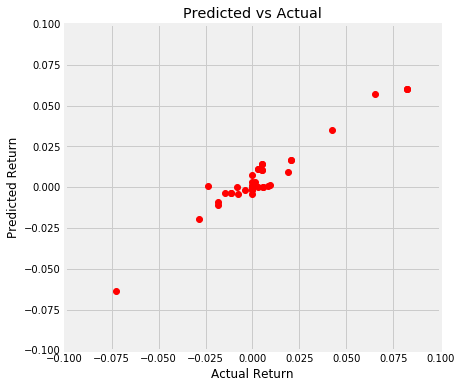

In [369]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, ypred2,'ro');
ax.set_xlabel('Actual Return')
ax.set_ylabel('Predicted Return')
plt.title('Predicted vs Actual')

ax.set_xlim(-0.1, 0.1)
ax.set_ylim(-0.1,0.1)

In [497]:
client = MongoClient(port=12345)
db = client.newstocks

In [483]:
bergencapitalnew = DataFrame(list(db.bergencapital2.find({})))
bergencapitalnew['user'] = 'Mike Bergen'

In [484]:
list1 = []
for i in range(len(bergencapitalnew['text'])):
    list1.append(bergencapitalnew['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(bergencapitalnew['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
bergencapitalnew['cleanedtext'] = se2.values

In [485]:
bergencapitalnew = bergencapitalnew[bergencapitalnew['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
bergencapitalnew = bergencapitalnew[bergencapitalnew['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]

# bergencapitalnew[bergencapitalnew.text.str.contains('|'.join(sandp100find))]

bergencapitalnew['date'] = bergencapitalnew['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

bergencapitalnew = bergencapitalnew.sort_values(by='date')
bergencapitalnewextract = bergencapitalnew.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
bergencapitalnewextract = bergencapitalnewextract.unstack()
bergencapitalnew = bergencapitalnew.join(bergencapitalnewextract)
bergencapitalnew = bergencapitalnew.reset_index()


for i in range(8, bergencapitalnew.shape[1]):
    bergencapitalnew.iloc[:,i] = bergencapitalnew.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [490]:
bergencapitalnew = bergencapitalnew[(bergencapitalnew['date']>datetime.date(2017,5,1)) & (bergencapitalnew['date']<datetime.date(2017,6,18))]




In [487]:
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# analyser = SentimentIntensityAnalyzer()

# def print_sentiment_scores(sentence):
#     snt = (analyser.polarity_scores(sentence)['compound'])
#     return snt


# listbergencapitalnew = []
# for i in bergencapitalnew.cleanedtext:
#     listbergencapitalnew.append(print_sentiment_scores(i))

# se3 = pd.Series(listbergencapitalnew)
# bergencapitalnew['compound'] = se3.values


# bergencapitalnew = bergencapitalnew[bergencapitalnew['compound'] > 0.0]
# bergencapitalnew.drop(['compound'], axis=1, inplace=True)

In [491]:
bergencapitalnew.shape

(2, 14)

In [489]:
def link_to_api(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(bergencapitalnew.iloc[:,7], bergencapitalnew.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
            first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
    first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
    final_list = [z*x for z,x in zip(first_list,enum_list)]
    return final_list


    
se = pd.Series(link_to_api(8))
bergencapitalnew['return_one_portfolio'] = se.values
bergencapitalnew['return_one_portfolio'] = pd.to_numeric(bergencapitalnew['return_one_portfolio'], errors='coerce')

In [492]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(bergencapitalnew.iloc[:,7], bergencapitalnew.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,3] - my_data.iloc[0,3])/my_data.iloc[0,3])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
bergencapitalnew['return_one'] = se.values
bergencapitalnew['return_one'] = pd.to_numeric(bergencapitalnew['return_one'], errors='coerce')

In [494]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(bergencapitalnew.iloc[:,7], bergencapitalnew.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
bergencapitalnew['volatility'] = se.values
bergencapitalnew['volatility'] = pd.to_numeric(bergencapitalnew['volatility'], errors='coerce')

**MARKDOW UPDATE**

In [864]:
markdownew = DataFrame(list(db.markdownew.find({})))
markdownew['user'] = 'Mark Dow'

In [865]:
list1 = []
for i in range(len(markdownew['text'])):
    list1.append(markdownew['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(markdownew['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
markdownew['cleanedtext'] = se2.values

In [866]:
markdownew = markdownew[markdownew['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
markdownew = markdownew[markdownew['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]

# bergencapitalnew[bergencapitalnew.text.str.contains('|'.join(sandp100find))]

markdownew['date'] = markdownew['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

markdownew = markdownew.sort_values(by='date')
markdownewextract = markdownew.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
markdownewextract = markdownewextract.unstack()
markdownew = markdownew.join(markdownewextract)
markdownew = markdownew.reset_index()


for i in range(8, markdownew.shape[1]):
    markdownew.iloc[:,i] = markdownew.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [867]:
markdownew = markdownew[(markdownew['date']>datetime.date(2017,5,1)) & (markdownew['date']<datetime.date(2017,6,18))]




In [868]:
markdownew = markdownew[markdownew.iloc[:,8] != 'FSLR']


In [869]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(markdownew.iloc[:,7], markdownew.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,10] - my_data.iloc[0,10])/my_data.iloc[0,10])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
markdownew['return_one'] = se.values
markdownew['return_one'] = pd.to_numeric(markdownew['return_one'], errors='coerce')

In [870]:
# amzndf.index.dayofweek

In [871]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(markdownew.iloc[:,7], markdownew.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(8))
markdownew['prev_day_volatility'] = se.values
markdownew['prev_day_volatility'] = pd.to_numeric(markdownew['prev_day_volatility'], errors='coerce')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [872]:
markdownew10 = markdownew.iloc[:,[5,8,10,11]]

markdownew10 = markdownew10.dropna()





column_names = ['user', 'Ticker', 'return_one', 'volatility']
markdownew10.columns = column_names
newdfnew = markdownew10.merge(finviz1, on='Ticker', how='left')

In [873]:
import patsy
def onehotencode(column_name):
    global newdfnew
    st = patsy.dmatrix(column_name,
                     data=newdfnew,
                     return_type='dataframe')
    newdfnew.drop([column_name], axis=1, inplace=True)
    newdfnew = newdfnew.join(st)
    newdfnew.drop(['Intercept'], axis=1, inplace=True)
    return newdfnew

newdfnew = onehotencode('Sector')
newdfnew = onehotencode('Industry')
newdfnew = onehotencode('Country')
newdfnew = onehotencode('Ticker')
newdfnew = onehotencode('user')

In [874]:
newdfnew.columns = newdfnew.columns.map(lambda x: x.replace('[', '_'))
newdfnew.columns = newdfnew.columns.map(lambda x: x.replace(']', ''))
newdfnew.columns = newdfnew.columns.map(lambda x: x.replace('.', ''))

In [875]:
Y_target2= newdfnew.iloc[:,1]
newdfnew.drop(['return_one'], axis=1, inplace=True)
X_data2 = newdfnew

In [876]:
xdata3 = pd.merge(X_data2, X_data, how='outer')

xdata3 = xdata3.fillna(0)

In [877]:
xdata3 = xdata3.iloc[[1,2],:]

In [878]:
list3 = model._Booster.feature_names

In [879]:
xdata3 = xdata3[list3]

In [649]:
# model._Booster.dump_model('dump.raw.txt')

In [880]:
markdownpredict = model.predict(xdata3)

In [881]:
markdownewfinal=markdownew.iloc[:,[7,4,5,8,10]].dropna()

In [916]:
markdownewfinal['prediction'] = markdownpredict

In [ ]:
column_names2 = ['Date', 'Tweet', 'User','Tiker' 'Actual_Return', 'Prediction']
markdownewfinal.columns = column_names2

In [729]:
markdownewfinal.to_csv('markdownewfinal.csv', index=False)

In [730]:
# check = pd.read_csv('markdownewfinal.csv')

**GECKOJB**

In [886]:
geckojbnew = DataFrame(list(db.geckojbnew.find({})))
geckojbnew['user'] = 'John Benedict'

In [887]:
list1 = []
for i in range(len(geckojbnew['text'])):
    list1.append(geckojbnew['text'].str.split(' http')[i][0])
    
se = pd.Series(list1)
se = se.str.replace('b"', "b'")
se = se.str.replace('$', "XX'")

list2 = []
for i in range(len(geckojbnew['text'])):
    list2.append(se.str.split("b'")[i][1])
    
    
se2 = pd.Series(list2)
geckojbnew['cleanedtext'] = se2.values

In [888]:
geckojbnew = geckojbnew[geckojbnew['cleanedtext'].str.contains('RT|@|closed|yesterday', case=False)==False]
geckojbnew = geckojbnew[geckojbnew['cleanedtext'].str.contains("XX'AAPL|XX'ABBV|XX'ABT|XX'ACN|XX'AGN|XX'AIG|XX'ALL|XX'AMGN|XX'AMZN|XX'AXP|XX'BA|XX'BAC|XX'BIIB|XX'BK|XX'BLK|XX'BMY|XX'BRK.B|XX'C|XX'CAT|XX'CELG|XX'CL|XX'CMCSA|XX'COF|XX'COP|XX'COST|XX'CSCO|XX'CVS|XX'CVX|XX'DD|XX'DHR|XX'DIS|XX'DOW|XX'DUK|XX'EMR|XX'EXC|XX'F|XX'FB|XX'FDX|XX'FOX|XX'FOXA|XX'GD|XX'GE|XX'GILD|XX'GM|XX'GOOG|XX'GOOGL|XX'GS|XX'HAL|XX'HD|XX'HON|XX'IBM|XX'INTC|XX'JNJ|XX'JPM|XX'KHC|XX'KMI|XX'KO|XX'LLY|XX'LMT|XX'LOW|XX'MA|XX'MCD|XX'MDLZ|XX'MDT|XX'MET|XX'MMM|XX'MO|XX'MON|XX'MRK|XX'MS|XX'MSFT|XX'NEE|XX'NKE|XX'ORCL|XX'OXY|XX'PCLN|XX'PEP|XX'PFE|XX'PG|XX'PM|XX'PYPL|XX'QCOM|XX'RTN|XX'SBUX|XX'SLB|XX'SO|XX'SPG|XX'T|XX'TGT|XX'TWX|XX'TXN|XX'UNH|XX'UNP|XX'UPS|XX'USB|XX'UTX|XX'V|XX'VZ|XX'WBA|XX'WFC|XX'WMT|XX'XOM", na=False, case=True)]

# bergencapitalnew[bergencapitalnew.text.str.contains('|'.join(sandp100find))]

geckojbnew['date'] = geckojbnew['created_at'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date())

geckojbnew = geckojbnew.sort_values(by='date')
geckojbnewextract = geckojbnew.cleanedtext.str.extractall(r"""(XX'[A-Z]+)""")
geckojbnewextract = geckojbnewextract.unstack()
geckojbnew = geckojbnew.join(geckojbnewextract)
geckojbnew = geckojbnew.reset_index()


for i in range(8, geckojbnew.shape[1]):
    geckojbnew.iloc[:,i] = geckojbnew.iloc[:,i].str.replace("XX'", '')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [889]:
geckojbnew = geckojbnew[(geckojbnew['date']>datetime.date(2017,5,1)) & (geckojbnew['date']<datetime.date(2017,6,18))]




In [890]:
def calc_return(X):
    count = 0
    enum_list = []
    first_list = []
    for a, b in zip(geckojbnew.iloc[:,7], geckojbnew.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            enum_list.append(np.nan)
            first_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% date_data), end_date=("%s"% new_date))
            total_sum = my_data.iloc[:,3].sum()
#             first_list.append(my_data.iloc[0,3]/total_sum)
            enum_list.append((my_data.iloc[-1,10] - my_data.iloc[0,10])/my_data.iloc[0,10])
            count += 1
#             print(first_list)
#         print(count)
    #     print(enum_list)
#     first_list = list(map(float, first_list))
    enum_list = list(map(float, enum_list))
#     final_list = [z*x for z,x in zip(first_list,enum_list)]
    return enum_list


    
se = pd.Series(calc_return(8))
geckojbnew['return_one'] = se.values
geckojbnew['return_one'] = pd.to_numeric(geckojbnew['return_one'], errors='coerce')

In [891]:

right_returns = ['0.018717147','-0.017107014','0.007552824']
geckojbnew['return_one'] = right_returns
geckojbnew['return_one'] = pd.to_numeric(geckojbnew['return_one'], errors='coerce')

In [892]:
#geckojbnew.to_csv('geckojbnewcheck.csv') to fix Todays value

In [893]:
# = pd.read_csv('geckojbnewcheck.csv')

In [894]:
def calc_volatility(X):
    count = 0
    low_list = []
    high_list = []
    close_list = []
    for a, b in zip(geckojbnew.iloc[:,7], geckojbnew.iloc[:,X]):
        if not b in quanstocklist:
    #     if b == 'SPY' or b == 'USO' or b == 'GDX' or b == 'AA' or b =='PBR' or b=='ALU' or b == 'STM' or b=='TSL' or b=='EEM' or b == 'XLF' or b=='GSK' or b=='ING' or b=='GLD' or b=='SFUN' or b=='BABA' or b=='GFI' or b=='ARMH' or b=='XX' or b=='MT' or b=='BCS' or b=='TLT' or b=='CSIQ' or b=='GSX' or b=='NUGT' or b=='WFT' or b=='SLV' or b=='UGAZ' or b=='SDRL' or b=='JNK' or b=='TBT' or b=='ASX':
            high_list.append(np.nan)
            low_list.append(np.nan)
            close_list.append(np.nan)
            count += 1
        else:
            date_data = a
            stock_name = b
            start_date = a - dt.timedelta(days=1)
            new_date = a + dt.timedelta(days=1)
            my_data = quandl.get(dataset =("WIKI/%s"% stock_name), start_date=("%s"% start_date), end_date=("%s"% new_date))
            low_list.append(my_data.iloc[0,2])
            high_list.append(my_data.iloc[0,1])
            close_list.append(my_data.iloc[0,3])
            count += 1
#             print(open_list)
#         print(count)
    #     print(enum_list)
    low_list = list(map(float, low_list))
    high_list = list(map(float, high_list))
    close_list = list(map(float,high_list))
    final_list = [0.5*np.log(np.nanmean(np.square((y-x)/z))) for x,y,z in zip(low_list,high_list,close_list)]
    return final_list

# 0.5*np.log(np.nanmean(np.square((highs-lows)/closes)


    
se = pd.Series(calc_volatility(9))
geckojbnew['prev_day_volatility'] = se.values
geckojbnew['prev_day_volatility'] = pd.to_numeric(geckojbnew['prev_day_volatility'], errors='coerce')

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


In [895]:
#For whatever Reason Quandl was unable to get Previous Day amzn volatility beneath is manually

In [896]:
0.5*np.log(np.nanmean(np.square((57.75-55.33)/55.46)))

-3.1318945000190364

In [897]:
geckojbnew.iloc[0,-1] = -3.1318945000190364

In [898]:
geckojbnew10 = geckojbnew.iloc[:,[5,8,28,29]]

# geckojbnew10 = geckojbnew10.dropna()





column_names = ['user', 'Ticker', 'return_one', 'volatility']
geckojbnew10.columns = column_names
newdfnew2 = geckojbnew10.merge(finviz1, on='Ticker', how='left')

In [899]:
geckojbnew10.head(3)

,user,Ticker,return_one,volatility
272,John Benedict,GOOG,0.018717,-3.131895
273,John Benedict,TGT,-0.017107,-3.268376
274,John Benedict,AMZN,0.007553,-2.858846


In [900]:
import patsy
def onehotencode(column_name):
    global newdfnew2
    st = patsy.dmatrix(column_name,
                     data=newdfnew2,
                     return_type='dataframe')
    newdfnew2.drop([column_name], axis=1, inplace=True)
    newdfnew2 = newdfnew2.join(st)
    newdfnew2.drop(['Intercept'], axis=1, inplace=True)
    return newdfnew2

newdfnew2 = onehotencode('Sector')
newdfnew2 = onehotencode('Industry')
newdfnew2 = onehotencode('Country')
newdfnew2 = onehotencode('Ticker')
newdfnew2 = onehotencode('user')

newdfnew2.columns = newdfnew2.columns.map(lambda x: x.replace('[', '_'))
newdfnew2.columns = newdfnew2.columns.map(lambda x: x.replace(']', ''))
newdfnew2.columns = newdfnew2.columns.map(lambda x: x.replace('.', ''))

In [901]:
newdfnew2.head()

,return_one,volatility,Sector_TTechnology,"Industry_TDiscount, Variety Stores",Industry_TInternet Information Providers,Ticker_TGOOG,Ticker_TTGT
0,0.018717,-3.131895,1.0,0.0,1.0,1.0,0.0
1,-0.017107,-3.268376,0.0,1.0,0.0,0.0,1.0
2,0.007553,-2.858846,0.0,0.0,0.0,0.0,0.0


In [902]:
Y_target2= newdfnew2.iloc[:,1]
newdfnew2.drop(['return_one'], axis=1, inplace=True)
X_data3 = newdfnew2

X_data3 = pd.merge(X_data3, X_data, how='outer')

X_data3 = X_data3.fillna(0)

# xdata3.iloc[[1,2,3],:]

list3 = model._Booster.feature_names

X_data3 = X_data3[list3]

X_data3 = X_data3.iloc[[0,1,2],:]

In [903]:
X_data3.head()

,volatility,Sector_TConsumer Goods,Sector_TFinancial,Sector_TIndustrial Goods,Sector_TServices,Sector_TTechnology,Industry_TApplication Software,Industry_TAuto Manufacturers - Major,Industry_TBeverages - Soft Drinks,Industry_TBusiness Services,Industry_TCopper,"Industry_TDiscount, Variety Stores",Industry_TDiversified Machinery,Industry_TElectronic Equipment,Industry_TFarm & Construction Machinery,Industry_TIndependent Oil & Gas,Industry_TIndustrial Equipment Wholesale,Industry_TIndustrial Metals & Minerals,Industry_TInformation Technology Services,Industry_TInternet Information Providers,Industry_TInvestment Brokerage - National,Industry_TMajor Airlines,Industry_TMeat Products,Industry_TMoney Center Banks,Industry_TProperty & Casualty Insurance,Industry_TRestaurants,Industry_TSecurity & Protection Services,Industry_TSpecialty Chemicals,"Industry_TSpecialty Retail, Other",Industry_TTelecom Services - Domestic,Industry_TTextile - Apparel Footwear & Accessories,Industry_TWireless Communications,Country_TUnited Kingdom,Ticker_TAIG,Ticker_TASCMA,Ticker_TCAT,Ticker_TCHK,Ticker_TCOH,Ticker_TCSLT,Ticker_TCVO,Ticker_TFAST,Ticker_TFB,Ticker_TFCX,Ticker_TFDX,Ticker_TGE,Ticker_TGM,Ticker_TGOOG,Ticker_TGS,Ticker_TIBM,Ticker_TJPM,Ticker_TKRO,Ticker_TMCD,Ticker_TMS,Ticker_TPEP,Ticker_TT,Ticker_TTAHO,Ticker_TTRIP,Ticker_TTSCO,Ticker_TTSN,Ticker_TTWTR,Ticker_TTXRH,Ticker_TUAL,Ticker_TVOD,Ticker_TWFC,Ticker_TWMT,user_Ticahn,user_Tlexvandam,user_Tpeterw
0,-3.131895,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.268376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.858846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [904]:
geckojbpredict = model.predict(X_data3)

In [905]:
geckojbfinal = geckojbnew.iloc[:,[7,4,5,8,28]]

In [ ]:
#xgboost._booster.dump (TRANSFER TO R and perform rest of predictions there)

In [911]:
geckojbfinal.head()

,date,text,user,"(0, 0)",return_one,prediction
272,2017-06-16,b'Come on $GOOG buy $SFM',John Benedict,GOOG,0.018717,-0.010297
273,2017-06-16,b'For value managers there are very little areas to invest in outside Energy and Retail. They must buy these names right? $TGT $RIG $KR $WMT',John Benedict,TGT,-0.017107,0.003892
274,2017-06-16,b'$AMZN is a cult stock. So many variable they must get right to pull off this $WFM deal but everyone just accepts they will.',John Benedict,AMZN,0.007553,0.025486


In [906]:
geckojbfinal['prediction'] = geckojbpredict

/Users/michaelcarrie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [912]:
column_names2 = ['Date', 'Tweet', 'User','Ticker', 'Actual_Return', 'Prediction']
# geckojbfinal['prediction'] = geckojbpredict
geckojbfinal.columns = column_names2

In [913]:
geckojbfinal.to_csv('geckojbfinal.csv', index=False)

In [ ]:
# Rest of Predictions in R

In [ ]:
import feather
path = 'sendtor.feather'


In [915]:
geckojbnew.head()

,index,_id,created_at,id,text,user,cleanedtext,date,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)","(0, 10)","(0, 11)","(0, 12)","(0, 13)","(0, 14)","(0, 15)","(0, 16)","(0, 17)","(0, 18)","(0, 19)",return_one,prev_day_volatility
272,186,5949c609ea2a7c59b3fe4cfb,2017-06-16 14:28:41,875721798847000576,b'Come on $GOOG buy $SFM',John Benedict,Come on XX'GOOG buy XX'SFM',2017-06-16,GOOG,SFM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.018717,-3.131895
273,2782,5949c609ea2a7c59b3fe571f,2017-06-16 14:21:11,875719911926005760,b'For value managers there are very little areas to invest in outside Energy and Retail. They must buy these names right? $TGT $RIG $KR $WMT',John Benedict,For value managers there are very little areas to invest in outside Energy and Retail. They must buy these names right? XX'TGT XX'RIG XX'KR XX'WMT',2017-06-16,TGT,RIG,KR,WMT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,-0.017107,-3.268376
274,2476,5949c609ea2a7c59b3fe55ed,2017-06-16 14:22:37,875720273089232897,b'$AMZN is a cult stock. So many variable they must get right to pull off this $WFM deal but everyone just accepts they will.',John Benedict,XX'AMZN is a cult stock. So many variable they must get right to pull off this XX'WFM deal but everyone just accepts they will.',2017-06-16,AMZN,WFM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.007553,-2.858846
